In [1]:
import uproot
import sys
import glob
import os
import struct
import time
import csv
import pickle
import math
import gc
import pandas as pd
import sympy

from IPython.core.display import display, HTML, Image

import numpy             as np
import matplotlib.pyplot as plt

import scipy
from   scipy             import interpolate
from   scipy.interpolate import CubicSpline, splev, splrep, interp1d, PPoly
from   scipy.optimize    import curve_fit, least_squares, minimize
from   scipy.signal      import find_peaks

import matplotlib             as mpl
import matplotlib.pyplot      as plt

from typing import List

#Plotting Config
mpl.style.use("default")
mpl.rcParams["axes.facecolor"] = "#EAEAF2" 
mpl.rcParams['figure.dpi']     = 100 
mpl.rcParams['savefig.dpi']    = 100 

# Basics 

###### Unique values from list

In [88]:
def unique(list1:list=[])->list:
    
    unique_list = []
    
    for x in list1:
        
        if (x not in unique_list):
            unique_list.append(x)
            
    return unique_list

In [ ]:
unique([1, 1, 2])

# Array and Strings

###### Check if given Parentheses expression is balanced or not

* Given a string str of length N, consisting of ‘(‘ and ‘)‘ only, the task is to check whether it is balanced or not.

In [ ]:
#Examples
Input: str = “((()))()()” 
Output: Balanced
Input: str = “())((())” 
Output: Not Balanced 

In [ ]:
"""
Declare a Flag variable which denotes expression is balanced or not.
Initialise Flag variable with true and Count variable with 0.
Traverse through the given expression
    If we encounter an opening parentheses (, increase count by 1
    If we encounter a closing parentheses ), decrease count by 1
    If Count becomes negative at any point, then expression is said to be not balanced, 
    so mark Flag as false and break from loop.
After traversing the expression, if Count is not equal to 0, 
it means the expression is not balanced so mark Flag as false.
Finally, if Flag is true, expression is balanced else not balanced."""

In [ ]:
#Code from GfG
def isBalanced(exp):

    # Initialising Variables
    flag = True
    count = 0
    
    # Traversing the Expression
    for i in range(len(exp)):
        if (exp[i] == '('):
            count += 1
        else:
             
            # It is a closing parenthesis
            count -= 1
        if (count < 0): 
            # This means there are
            # more closing parenthesis
            # than opening
            flag = False
            break
    # If count is not zero ,
    # it means there are more
    # opening parenthesis
    if (count != 0):
        flag = False
        
    return flag
 
# Driver code
if __name__ == '__main__':
     

    exp1 = "((()))()()"

    if (isBalanced(exp1)):
        print("Balanced")
    else:
        print("Not Balanced")

    exp2 = "())((())"

    if (isBalanced(exp2)):
        print("Balanced")
    else:
        print("Not Balanced")

###### Two Sum

Given an array of integers __nums__ and an integer __target__, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

In [ ]:
#Example 1
Input: nums = [2, 7, 11, 15], target = 9
Output: [0,1]

In [ ]:
#Example 2
Input: nums = [3,2,4], target = 6
Output: [1,2]

In [ ]:
#Example 3
Input: nums = [3,3], target = 6
Output: [0,1]

In [ ]:
Constraints:

    2 <= nums.length <= 104
    -109 <= nums[i] <= 109
    -109 <= target <= 109
    Only one valid answer exists.

In [ ]:
#Follow-up: 
Can you come up with an algorithm that is less than O(n2) time complexity?b   

In [221]:
## O(n^2) time complexity solution
def returnIndices(nums=[], target=0):
    
    lst_sol_indices = []
    
    #For each element in nums
    for i in range(0, len(nums)):
        for j in range(0, len(nums)):
            
            if (i <= j):
                continue
            
            elif (nums[i] + nums[j]) == target:
                
                #list of wanted indices
                lst_sol_indices = lst_sol_indices + [i, j]
                break
                
#     #Just reverse order - not needed
#     if(lst_sol_indices[0] > lst_sol_indices[1]):
#         temp = lst_sol_indices[0]
#         lst_sol_indices[0] = lst_sol_indices[1]
#         lst_sol_indices[1] = temp

    return lst_sol_indices

In [45]:
#O(n) solution - HASH TABLE
#    -Reduce lookup time from O(n) to O(1) by trading space for speed
#    -A hash table supports fast loopup in near constant time.
#    -Hashing is a technique to convert a range of key values into a range of indexes of an array
def return_Indices_hash(nums=[], target=0):
    
    #Hashing dictiionary
    hashmap = {}
    
    for i in range(len(nums)):
        hashmap[nums[i]] = i
        
    for i in range(len(nums)):
        
        diff = target - nums[i]
        
        if (diff in hashmap) and (hashmap[diff] != i):
            return [i, hashmap[diff]]

In [ ]:
print(returnIndices([3, 2, 4], 6))

print(returnIndices([2, 7, 11, 15], 9))

print(return_Indices_hash([3, 2, 4], 6))

print(returnIndices([2, 7, 11, 15], 9))

###### Longest Substring Without Repeating Characters [unsolved]

Given a string s, find the length of the longest substring without repeating characters.

In [206]:
returnIndices([2, 7, 11, 15], 9)

[1, 0]

In [ ]:
#Example
Input: s = "abcabcbb"
Output: 3
Explanation: The answer is "abc", with the length of 3.

Input: s = "bbbbb"
Output: 1
Explanation: The answer is "b", with the length of 1.
    
Input: s = "pwwkew"
Output: 3
Explanation: The answer is "wke", with the length of 3.
Notice that the answer must be a substring, "pwke" is a subsequence and not a substring.

In [2]:
#LeetCode solution
def lengthOfLongestSubstring(s: str) -> int:
    def check(start, end):
        
        #Create an array of 128 zeros.
        #    -Place 1 to the place of array that corresponds to the unicode code of the char
        #    -If any of the elements exceeds 1 -> repeating chars
        chars = [0] * 128
        for i in range(start, end + 1):
            c = s[i]
            chars[ord(c)] += 1
            if chars[ord(c)] > 1:
                return False
        return True

    n = len(s)

    res = 0
    for i in range(n):
        for j in range(i, n):
            if check(i, j):
                res = max(res, j - i + 1)
    return res

In [4]:
#Call
lengthOfLongestSubstring("pwwkew")

3

In [135]:
#longest Sub w/o repeat - NOT WORKING YET
def long_substr_wo_repeat(string=""):
    
    longest_substr  = ""
    substr_len      = 0
    i_of_longest    = 0
    substr_len_lngt = 0 
    
    #Find non-repeating 
    #    -Only one of each char in the substr
    #    -For each element, check when it occurs again in the string
    for i in range(len(string)):
        
        #RANGE IMPORTANT!!!
        for j in range(i+1, len(string)-i):
            
            #Go to next i if repeated
            if (string[i] == string[j]):
                                
                #Start over with next char
                substr_len = 0
                break
                
            #If char is not repeating
            elif (string[i] != string[j]):
                substr_len += 1
                
                #Test the length and save
                if (substr_len > substr_len_lngt):
                    i_of_longest    = i
                    substr_len_lngt = substr_len
                
                print("i = ", i, "\t","j = ", j, "\t", substr_len, substr_len_lngt)
                continue
            
    #longest
    longest_substr = string[i_of_longest : (i_of_longest+substr_len_lngt)+1] 
    
#     print("i_of_longest = ", i_of_longest)
#     print("substr_len_lngt = ", substr_len_lngt)
        
    return longest_substr

In [ ]:
long_substr_wo_repeat("pwwkew")

In [ ]:
#Iterate
i=0: string[i]=a
    
    j=1: string[j]=b
    substr_len = 1
    
    j=2: string[j]=c
    substr_len = 2
    
    j=3: string[j]=a
    substr_len = 0
    break
    
i=1: string[i]=b
    
    j=2: string[j]=c
    substr_len = 1
    
    j=3: string[j]=a
    substr_len = 2
    
    j=4: string[j]=b
    substr_len = 0
    break      

###### Tripler (BNL question)

A little demon, called Tripler, like to mess up with our friend, Array. Tripler transforms an array by
tripling each element in the array, throwing them into the original array, and worst of all, shuffling the
entire array. For example, if the original array is [1, 2, 3], Tripler’s array could be [1, 2, 3, 3, 6, 9] or [9, 3,
1, 3, 2, 6] or something else. Now, given Tripler's array, how can you find the original array (in any
order)?

* 1 <= v.length <= 105
* 0 <= v[i] <= 105[][d

In [ ]:
def tripler_Detect(list=[]):
    #Select out only the unique elements in the tripled list
    #Tripler_reduced = list.uniique()
    Tripler_reduced = Tripler_reduced.sort()
    Org_list = []
    Duplicated = []
    
    for I in range(len(Tripler_reduced)):
    
        if (Tripler_reduced[I] %3 != 0):
            Org_list.append(Tripler_reduced[i])
    
    #Org=[1, 1, 2]
    Tripler_reduced.pop([I for I in Org_list])
    
    # Tri = [3, 3, 3, 6, 9]
    Duplicated = [I/3 for I in Tripler_reduced)]
    
    #Duplicated=[1, 1, 1, 2, 3]
    for I in Duplicated:
        if (I not in Org_list):
            Org_list.append(I)
    
    #Org=[1, 1, 2, 3]
    return Org_list

###### Product of Array Except Self (medium): [unsolved]

Given an integer array `nums`, return an array answer such that `answer[i]` is equal to the product of all the elements of nums except `nums[i]`.

The product of any prefix or suffix of nums is guaranteed to fit in a 32-bit integer.

You must write an algorithm that runs in O(n) time and without using the division operation.

In [ ]:
#Examples
Input: nums = [1,2,3,4]
Output:[24,12,8,6]
    
#Examples
Input: nums = [-1,1,0,-3,3]
Output: [0,0,9,0,0]

In [58]:
#Product func in O(n^2)
def prod_Except_Self(nums:list=[])->list:
    
    #declares
    fin_list   = []
    crrnt_list = []
    current    = 1
    
    for i in range(len(nums)):
        
        crrnt_list = nums[0:i] + nums[i+1:len(nums)]
        
        for j in range(len(crrnt_list)):
            
            current = current * crrnt_list[j]
        
        fin_list.append(current)
        current = 1
        
    return fin_list

In [67]:
#Product func in O(n) usning numpy
def prod_Except_Self(nums:list=[])->list:
    
    #declares
    fin_list   = []
    crrnt_list = []
    current    = 1
    
    for i in range(len(nums)):
        
        crrnt_list = nums[0:i] + nums[i+1:len(nums)]
        
        #Using numpy
        current = np.prod(crrnt_list)
                
        fin_list.append(current)
        current = 1
        
    return fin_list

In [ ]:
prod_Except_Self([-1,1,0,-3,3])

In [77]:
#Product func in O(n) - [unsolved]
def prod_Except_Self(nums:list=[])->list:
    
    #declares
    fin_list   = []
    
        
    return fin_list

In [ ]:
prod_Except_Self([-1,1,0,-3,3])

###### Longest Palindromic Substring

* Given a string `s`, return the longest palindromic substring in s.
* palindrome is a word that is same when read backwords

In [ ]:
#Example1
Input: s = "babad"
Output: "bab"
Explanation: "aba" is also a valid answer.
    
Input: s = "cbbd"
Output: "bb"
    
Input: s = "asdaffadsasa"
Output: "asdffdsa"
    

In [83]:
#Brue Force way: LeetCode sol.
def longest_Palind(s:str="") -> str:
    
    #1. Pick all possible substrings to vertify if its a palindrom
    
    #Declares
    common_subs = {}

    #Check if string is palindrom
    def isPalindrome(s):
        if (s==""):
            return False
        for i in range(len(s)//2):
            if s[i]!=s[-i-1]:
                return False
        return True
    
    #Test every substrings
    for i in range(len(s)):
        for j in range(0, len(s)):
            if isPalindrome(s[i:j+1]):
                common_subs[s[i:j+1]] = len(s[i:j+1])
                
    return max(common_subs, key=common_subs.get)

In [ ]:
#Iterate isPalindrom for loop
s="cabac"
for i in range(5//2):

    i=0:
        s[i]    = s[0]  = c
        s[-i-1] = s[-1] = c

    i=1:
        s[1]  = a
        s[-2] = a

In [ ]:
#Brute Force way
def longest_Palind(s:str="") -> str:
    
    #1. I want to see when the element is repeated
    #2. When an element "i" is repeated, I want to look at elements inbetween the first and last occurances 
    #   of element i
    #    - I will call left_end_i and right_end_i
    #        - if there is multiple repeating of i, then I will just run the testing subroutine define
    #          below for each of the repeated occurences of left_end_i.
    #3. Then we can examine the preceeding element one right of left_end_i and see if it is repeated at
    #   one left of right_end_i
    #    - I will call this next_i
    #        - If there is only one element inbetween left_end_i and right_end_i,
    #          then, it is a palindromic of length 3.
    #        - If this next_i is repeated at the left of right_end_i, keep traversing to right of next_i
    #4. As you traverse and find that it is a palindrome substring, save it and call it "crrnt_lngst"
    #5. Return to the first left_end_i and see if it repeated more than once to the right of first right_end_i
    #    -I will repeat the process defined in #3.
    
    #declares
    left_end_i  = 0
    right_end_i = 0
    next_ i     = 0
    crrnt_lngst = ""
    
    for i in range(len(s)):
        
                

###### Group Anagram

* Given an array of strings strs, group the anagrams together. You can return the answer in any order.
* An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.


In [ ]:
#Examples
Input: strs = ["eat","tea","tan","ate","nat","bat"]
Output: [["bat"],["nat","tan"],["ate","eat","tea"]]
    
Input: strs = [""]
Output: [[""]]
    
Input: strs = ["a"]
Output: [["a"]]

In [143]:
#Using just python programming
def group_Anagrams(listStr:List[str]) -> List[List[str]]:
    
    #1. Sort each word and use the sorted word as a dictionary key
    #2. Keep adding new word into dictionary against sorted key
    
    #Declares
    group_dict = {}
    group_list = []
    
    
    #Func to Create Anagram key: sorted words
    def create_Anagram_Key(string):
        key = ""
        for i in sorted(string):
            key += i
        return key

    #Add words
    for i in listStr:
        
        #If the sorted(word) is not a key yet, make a key + include word into the key
        if (group_dict.get(create_Anagram_Key(i)) == None):
            group_dict[create_Anagram_Key(i)] = [i]
            
        #If key sorted(word) already exists, just append the word to
        else:
            group_dict[create_Anagram_Key(i)].append(i)
            
    #Append values to the final return list
    for key, value in group_dict.items():
        group_list.append(value)
    
    return group_list

In [144]:
group_Anagrams(["eat","tea","tan","ate","nat","bat"])

[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]

###### Find the substring that every element is repeated k at least k times

* __Find the substring that every element is repeated k times__

In [ ]:
#Example
Input: s = “xyxyyz”, k = 2 
Output: 5 
    
Input: s = “geeksforgeeks”, k = 2 
Output: 2 
    
Input: str = “aabbba”, K = 3
Output: 6 
    
Input: str = “ababacb”, K = 3
Output: 0 

In [10]:
#Brute force way
def largest_AtLeastK(string:str="", k:int=0) -> int:
    
    #EX
    #"xyxyyz"
    #"xyxyyz"
    
    #1. Consider all the possible substrings
    #2. For every substring, calculate the frequency of each of its chars
    #    -Check whether all the characters appear at least K times.
    #4. For all such valid substrings, find the largest length possible
    
    #Declares
    num_Alphabets = 26
    n             = len(string)
    maxLen        = 0
    freq          = [0]*num_Alphabets

    #Function that return true if frequency of all the present characters is at least k
    def atLeastK(freq, k) :
        for i in range(num_Alphabets) :
            # If the character is present and its frequency is less than k
            if (freq[i] != 0 and freq[i] < k) :
                return False;
        return True;    
    
    #Set freq array to zeroes
    def setZero(freq):
        for i in range(num_Alphabets):
            freq[i] = 0
    
    #Main loop
    for i in range(n):
        
        #Initialize
        setZero(freq)
            
        for j in range(i, n):
            
            #Updating the indices of freq: # of occurances of letters
            #    -ord("a") need to have range: 1-26
            freq[ord(string[j]) - ord("a")] += 1
            
            #If the frequency of every char of the current substring is at least k
            if (atLeastK(freq, k)):
                maxLen = max(maxLen, j-i+1);
                
    return maxLen

In [ ]:
largest_AtLeastK("geeksforgeeks", 2)

# Linked Lists 

###### Add Two Numbers

You are given two non-empty linked lists representing two non-negative integers. The digits are stored in reverse order, and each of their nodes contains a single digit. Add the two numbers and return the sum as a linked list.

You may assume the two numbers do not contain any leading zero, except the number 0 itself.

In [ ]:
#Example
Input: list1 = [2,4,3], list2 = [5,6,4]
Output: [7,0,8]
Explanation: 342 + 465 = 807.
    
Input: l1 = [0], l2 = [0]
Output: [0]
    
Input: l1 = [9,9,9,9,9,9,9], l2 = [9,9,9,9]
Output: [8,9,9,9,0,0,0,1]

In [234]:
def add_Two_Numbers(list1:list, list2:list) -> list:

    #list1=[2, 4, 3], list2=[5,6,4]
    #number1 = 342,   number2 = 465
    #number3 = 342+465 = 807
    #output = [7, 0, 8]

    #1. reverse the order of list1 and list2
    #2. list1, list2 -> number1, number 2 by first element being the leading number and so on.
    #3. Add number1 and number2 = number3
    #4. number3 -> list with digits in reverse order

    #Declares
    number3 = 0
    number1_str = ""
    number2_str = ""
    output  = []

    #Reverse order
    list1.reverse()
    list2.reverse()

    #For number1
    for i in range(len(list1)):
        number1_str += str(list1[i])

    #For number2
    for i in range(len(list2)):
        number2_str += str(list2[i])

    #Add nubmers
    number3 = int(number1_str) + int(number2_str)

    #into str, revers, list
    number3_str = str(number3)
    number3_str_reverse = ""

    #Starting from last value len(__)-1 until the first value of list 0.
    for i in range(len(number3_str)-1, -1, -1):
        number3_str_reverse += number3_str[i]

    #Into list
    for i in number3_str_reverse:
        output.append(i)

    print(output)
    return output

In [ ]:
add_Two_Numbers([2,4,3], [5, 6,4])

In [231]:
#two numbers 1
def add_two_nums(list1=[], list2=[]):
    
    first_num_str  = ""
    second_num_str = ""
    
    #Compose first num
    for i in range(len(list1)-1, -1, -1):

        #str obj of first number
        first_num_str += str(list1[i])
    
    #Compose second num
    for i in range(len(list2)-1, -1, -1):

        #str obj of first number
        second_num_str += str(list2[i])
    
    #Digitize final number
    fin_num_str = str(int(first_num_str) + int(second_num_str))
    fin_list    = [int(fin_num_str[i]) for i in range(len(fin_num_str)-1, -1, -1)]
    
    #Using built-in reverse() fn
    #fin_list    = [int(i) for i in fin_num_str]
    #fin_list.reverse() 
    
    return fin_list

In [ ]:
add_two_nums([9,9,9,9,9,9,9], [9,9,9,9])

# Trees and Graphs 

###### Binary Search Tree - Validate

Given the `root` of a binary tree, determine if it is a valid binary search tree (BST).

A valid BST is defined as follows:
* The left subtree of a node contains only nodes with keys less than the node's key.
* The right subtree of a node contains only nodes with keys greater than the node's key.
* Both the left and right subtrees must also be binary search trees.


In [ ]:
#Examples
Input: root = [2,1,3]
Output: true

In [ ]:
Image(filename="./figs/BST_ex1.png")

In [ ]:
Input: root = [5,1,4,null,null,3,6]
Output: false
Explanation: The root node's value is 5 but its right child's value is 4.

In [ ]:
Image(filename="./figs/BST_ex2.png")

In [ ]:
Image(filename="./figs/BST_ex3.png")

In [ ]:
#Class for tree node
#    -testing BST method defined inside class
#Recursive testing
#    -Check one node of its left and right value. Then go to next ones
class TreeNode:
    
    def __init__(self, val=0, left=None, right=None):
        """
        :type value: int
        :type left: int
        :type right: int
        """
        self.val   = val
        self.left  = None
        self.right = Nones
        
    def isValidBST(self, root: TreeNode) -> bool:

        def validate(node, low=-math.inf, high=math.inf):
            # Empty trees are valid BSTs.
            if not node:
                return True
            
            # The current node's value must be between low and high.
            if node.val <= low or node.val >= high:
                return False

            # The left and right subtree must also be valid.
            return (validate(node.right, node.val, high) and
                   validate(node.left, low, node.val))

        return validate(root)        

In [332]:
#CReate BST
a = TreeNode(2, 1, 3)

#Check if BST
a.isValidBST(a)

###### Binary Search Tree - Insertion (GeeksforGeeks)

In [ ]:
#Insertion of a key
#    -Search a key from root until we hit a leaf node
#    -Add the new node as a child of the leaf node
#Binary Search Tree
#    -The left subtree of a node contains only nodes with keys less than the node's key.
#    -The right subtree of a node contains only nodes with keys greater than the node's key.

         100                               100
        /   \        Insert 40            /    \
      20     500    --------->          20     500 
     /  \                              /  \  
    10   30                           10   30
                                            \
                                             40

In [236]:
#A Node class for individual node
class Node:
    
    def __init__(self, key):
            self.left  = None
            self.right = None
            self.val   = key

In [237]:
#function to insert a new node
def insert(root, key):
    
    #If no root (no Node is created), create a Node
    #    -this will be called when root.right or root.left doesn't exist
    if root is None:
        return Node(key)
    
    #If there is a Node
    else:
        
        #If the key to be added is the value of the root of the Node, just return root
        if root.val == key:
            return root
        
        #RECURSION
        #If the key to be added is less than root.value, insert
        #If the root.right DOESN'T exist, create a node with value of "key" and equate it to root.right
        elif (root.val<key):
            root.right = insert(root.right, key)
            
        #If the key to be added is less than root.value, insert
        else:
            root.left = insert(root.left, key)
            
    return root
            
#Fn. to check if BST is in order
def inorder(root):
    
    if root:
        inorder(root.left)
        print(root.val)
        inorder(root.right)
            

In [ ]:
# Driver program to test the above functions
# Let us create the following BST
#    50
#  /     \
# 30     70
#  / \ / \
# 20 40 60 80

r = Node(50)
r = insert(r, 30)
r = insert(r, 20)
r = insert(r, 40)
r = insert(r, 70)
r = insert(r, 60)
r = insert(r, 80)

#See if in order
inorder(r)

###### Number of Islands - DFS (Depth First Search)

Given an m x n 2D binary grid grid which represents a map of '1's (land) and '0's (water), return the number of islands.

An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.

In [ ]:
#Examples
Input: grid = [["1","1","1","1","0"],
               ["1","1","0","1","0"],
               ["1","1","0","0","0"],
               ["0","0","0","0","0"]]
Output: 1
    
    
Input: grid = [["1","1","0","0","0"],
               ["1","1","0","0","0"],
               ["0","0","1","0","0"],
               ["0","0","0","1","1"]]
Output: 3

In [ ]:
class Solution(object):

    # 1.Treat the 2d grip map as an undirected graph and there is an edge between two horizaontally or 
    #   vertically adjacent nodes of value "1".
    
    def numIslands(self, grid):
        islands = 0
        for i in range(len(grid)):  
            for j in range(len(grid[0])):
                if grid[i][j] == '1':
                    islands += 1
                    self.part_of_island(i,j,grid)
        return islands

    def part_of_island(self, i, j,grid):
        if i < 0 or j < 0 or i == len(grid) or j == len(grid[0]) or grid[i][j] != '1':
            return
        else:
            grid[i][j] = '0'
        self.part_of_island(i,j+1,grid)
        self.part_of_island(i,j-1,grid)
        self.part_of_island(i+1,j,grid)
        self.part_of_island(i-1,j,grid)  

###### Binary Tree Zigzag Level Order Traversal (BFS)

* Given the __root__ of a binary tree, return the zigzag level order traversal of its nodes' values. (i.e., from left to right, then right to left for the next level and alternate between).

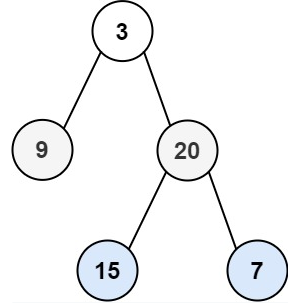

In [15]:
Image(filename="./figs/bst_zigzag.png")

In [ ]:
#Examples
Input: root = [3,9,20,null,null,15,7]
Output: [[3],[20,9],[15,7]]
    
Input: root = [1]
Output: [[1]]
    
Input: root = []
Output: []

In [ ]:
Image(filename="./figs/BST_zigzag_sol.png")

In [17]:
# 1.Key: Using "deque": double-ended queue data structure: add new values on either end of queue
# 2.Simply do the normal BFS and maintain a dictionary that can contain values in deque for a particular
#   level. So, based on which level you are, you can append right or append left in the deque.

# O(n) time complexity and O(n) space complexity
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def zigzagLevelOrder(self, root: TreeNode) -> List[List[int]]:
        if not root:
            return []
        
        level = 0 # to track the level on which we are currently
        # dictionary that store the node vals for each level as key
        # deque would give us the flexibilty for zigzag entries
        # we can append at left or append at right based on the current
        # level we are working on
        dict_level = defaultdict(deque)
        # deque for performing bfs
        dq = deque([root])
        while dq:
            # get the current level size, means how many elements 
            # currently in this level
            level_size = len(dq)
            for i in range(level_size): # until the current level size
                node = dq.popleft() # we pop from the left of dq
                # if we are at level number which is odd, we will 
                # appendleft the values in deque for that level
                if (level%2 == 1):
                    dict_level[level].appendleft(node.val)
                # Otherwise we will append at right
                else:
                    dict_level[level].append(node.val)
                # put the left and right child nodes in the queue
                if node.left:
                    dq.append(node.left)
                if node.right:
                    dq.append(node.right)
            # increment the level when we are finished with current level
            level += 1 
        # now the dictionary values are the list that contains the zigzag
        # traversal that we want to see
        # print(dict_level.values())
        return dict_level.values()

###### Number of Connected Components in an Undirected Graph - DFS + Recursion

You have a graph of n nodes. You are given an integer n and an array edges where edges[i] = [ai, bi] indicates that there is an edge between ai and bi in the graph. `Graph NOT sorted data structure!`

Return the number of connected components in the graph.

In [ ]:
#Examples 1
Input: n = 5, edges = [[0,1],[1,2],[3,4]]
Output: 2

In [ ]:
Image(filename="figs/Undirected_graph_ex1.png")

In [ ]:
#example 2
Input: n = 5, edges = [[0,1],[1,2],[2,3],[3,4]]
Output: 1

In [ ]:
Image(filename="figs/Undirected_graph_ex2.png")

In [ ]:
Image(filename="./figs/DFS_undirected_graph.png")

* If we run DFS, starting from a particular vertex, it will continue to visit the vertices depth-wise until there are no more adjacent vertices left to visit. 
* Thus, it will visit all of the vertices within the connected component that contains the starting vertex. 
* Each time we finish exploring a connected component, we can find another vertex that has not been visited yet, and start a new DFS from there. 
* The number of times we start a new DFS will be the number of connected components.

In [29]:
#LeetCode sol.
def count_Connected(n:int, edges:List[List[int]]) -> int:
    
    #Declares
    count = 0
    graph = [[] for i in range(n)]
    seen  = [False for i in range(n)]
    
    #graph: each element is a list that contains adjacent nodes to the node (# marked by index of list)
    #    -graph[0] = [1]: node 0 has adjacent node of 1.
    #    -graph[1] = [0, 2]: node 1 has adjacent nodes of 0 and 2.
    for a, b in edges:
        graph[a].append(b)
        graph[b].append(a)
        
    #Recursion
    #    -For each node, loop thru each of its adjacent nodes
    def dfs(node):
        for adj in graph[node]:
            if not seen[adj]:
                seen[adj] = True
                dfs(adj)
                
    for i in range(n):
        if not seen[i]:
            count += 1
            seen[i] = True
            dfs(i)
            
    return count

In [ ]:
#Call
count_Connected(5, [[0,1],[1,2],[2,3],[3,4]])

In [ ]:
#Example
n = 5
edges = [[0,1],[1,2],[2,3],[3,4]]

graph = [[] for i in range(n)]
seen  = [False for i in range(n)]

for a, b in edges:
    graph[a].append(b)
    graph[b].append(a)

print(graph)

In [ ]:
#Example - Iterate
i=0
    seen[0] = False
        count   = 1
        seen[0] = True
        dfs(0)
            
            for i in graph[0] = 1
                seen[1] = True
                dfs(1)

                    for i in graph[1] = [0, 2]
                        seen[2] = True
                        dfs(2)
                        
                            for i in graph[2] = [1, 3]
                                seen(3) = True
                                dfs(3)
                            
                                    for i in graph[3] = [2, 4]
                                        seen(4) = True
                                        def(4)
                                        
                                            for i in graph[4] = [3]
                                                NOTHING
i=1
    seen[1] = True
i=2
    seen[2] = True
i=3
    seen[3] = True
i=3
    seen[3] = True

# Recursion 

###### Recursion - Calling a function within itself

In [350]:
def factorial(x):
    """
    This is a recursive function to find the factorial of an integer
    """
    
    if x==1:
        return 1
    
    else:
        return(x*factorial(x-1))

In [ ]:
num=3
print("The factorial of ", num, "is ", factorial(num))

###### Letter Combinations of a Phone Number - [unsolved]

Given a string containing digits from `2-9` inclusive, return all possible letter combinations that the number could represent. Return the answer in any order.

A mapping of digit to letters (just like on the telephone buttons) is given below. Note that 1 does not map to any letters.

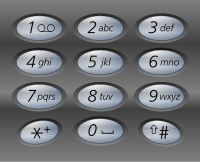

In [80]:
Image(filename="./figs/letter_comb.png")

In [ ]:
#Examples
Input: digits = "23"
Output: ["ad","ae","af","bd","be","bf","cd","ce","cf"]
    
Input: digits = ""
Output: []
    
Input: digits = "2"
Output: ["a","b","c"]

In [ ]:
#Letter combi.
def letter_Combi(string_dig:str="")->list:
    
    #declares
    dig_letter_dict = {}
    dig_letter_dict["2"] = ["a","b","c"]
    dig_letter_dict["3"] = ["d","e","f"]
    dig_letter_dict["4"] = ["a","b","c"]
    dig_letter_dict["5"] = ["a","b","c"]
    dig_letter_dict["6"] = ["a","b","c"]
    dig_letter_dict["7"] = ["a","b","c"]
    dig_letter_dict["8"] = ["a","b","c"]
    dig_letter_dict["9"] = ["w","x","y","z"]
    
    letters      = "abcdefghijklmnopqrstuv"
    poss_letters = []
    poss_unique  = []
    
    curent_combo = ""
    fin_list     = []
    
    for i,j in zip(range(2, 9), range(len(letters))):
        dig_letter_dict["{:d}".format(i)] = [letters[j]]
    
    #Let's say I have a dict.: key=digit and value=list containing letters
    #dict={"2":[a,b,c], "3":[e,f,g], ...}
    
    for i in string_dig:
        #list of all letters pertaining to the digit
        poss_letters = poss_letters + dig_letter_dict[i]
            
    #Unique
    for i in poss_letters:
        if (i not in unique_list):
            unique_list.append(i)
            
    #Possible combinations
    for i in range(len(unique_list)):
        
        for j in range():


In [97]:
#Leetcode solution
def letterCombinations(digits: str) -> list:
    # If the input is empty, immediately return an empty answer array
    if len(digits) == 0: 
        return []

    # Map all the digits to their corresponding letters
    letters = {"2": "abc", "3": "def", "4": "ghi", "5": "jkl", 
               "6": "mno", "7": "pqrs", "8": "tuv", "9": "wxyz"}

    def backtrack(index, path):
        # If the path is the same length as digits, we have a complete combination
        if len(path) == len(digits):
            combinations.append("".join(path))
            return # Backtrack

        # Get the letters that the current digit maps to, and loop through them
        possible_letters = letters[digits[index]]
        for letter in possible_letters:
            # Add the letter to our current path
            path.append(letter)
            # Move on to the next digit
            backtrack(index + 1, path)
            # Backtrack by removing the letter before moving onto the next
            path.pop()

    # Initiate backtracking with an empty path and starting index of 0
    combinations = []
    backtrack(0, [])
    return combinations

###### Permutations - Backtracking

Given an array nums of distinct integers, return all the possible permutations. You can return the answer in any order.

In [ ]:
#Examples
Input: nums = [1,2,3]
Output: [[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]]
    
Input: nums = [0,1]
Output: [[0,1],[1,0]]

Input: nums = [1]
Output: [[1]]

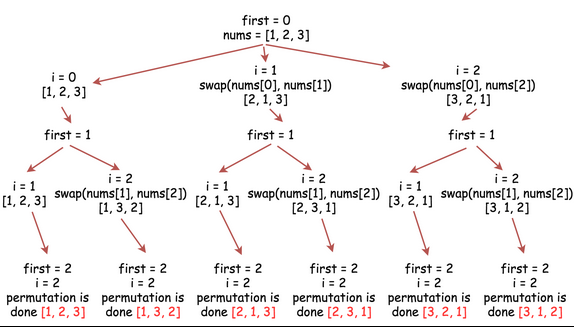

In [170]:
Image(filename="figs/backtracking.png")

In [212]:
#LeetCode sol.
#    -Backtracking: algorithm for finding solutions by exploring all potential candidates
#        -If the solution candidate turns to be not a solution, discard it by making some changes on previous
#        -step, hence the name backtracks and then try again.
def permute(nums):
    """
    :type nums: List[int]
    :rtype: List[List[int]]
    """
    #Declares
    n = len(nums)
    output = []
    
    #It will increment on "first" variable
    def backtrack(first = 0):
        
        # if all integers are used up
        if first == n:  
            output.append(nums[:])
            
        for i in range(first, n):
            #place i-th integer first in the current permutation
            nums[first], nums[i] = nums[i], nums[first]
            
            print(f"first = {first}")
            print(f"I     = {i}")
            
            #use next integers to complete the permutations
            backtrack(first + 1)
            
            #backtrack
            nums[first], nums[i] = nums[i], nums[first]
            
            print("===================================")

    backtrack()
    return output

In [ ]:
#call
permute([1, 2, 3])

In [ ]:
#Iterations
nums = [1, 2, 3]

i=0, first=0
    nums[0], nums[0] = 1, 1
    
    backtrace(1)
        i=1, first=1 """COME TO HERE after this loop!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!"""
            nums[1], nums[1] = 2, 2
            
            backtrace(2)
                i=2, first=2
                    nums[2], nums[2] = 3, 3
                    
                    backtrace(3)
                        output.append([1,2,3])
                        
                        
                        
        i=2, first=1
            nums[1], nums[2] = 3, 2
            
            backtrace(2)
                i=2, first=2
                    nums[2], nums[2] = 2, 2
                    
                    backtrace(3)
                        output.append([1, 3, 2])
                        
i=1, first=0
    nums[0], nums[1] = 2, 1

###### Permutation

Generate all permutation of a list in Python

In [240]:
#GfG sol.
from typing import List

def permute(nums:List[int]) -> List[List[int]]:

    #1. Extract one element at a time
    #2. Place them at the first position
    #3. From the remaining list, I will repeat by extracting one element 
    #   and placing them at the next first position. And Continue.

    #Declares
    output_list = []

    #Empty list
    if (len(nums)==0):
        return []

    #If only one element in list
    if (len(nums)==1):
        return [nums]

    #len(nums) >1
    for i in range(len(nums)):
        
        #current element
        crrnt_elm = nums[i]

        #list except currnt element
        remain_list = nums[:i] + nums[i+1:]

        #Recur by calling permute on the remain_list
        next_list = permute(remain_list)

        for j in next_list:
            output_list.append([crrnt_elm] + j)

#         print(f"i = {i}")
#         print(f"crrnt_elm = {crrnt_elm}")
#         print(f"remain_list = {remain_list}")
#         print(f"next_list = {next_list}")
#         print(f"output_list = {output_list}")        
#         print("=================================")
#         print("=================================")
    
    return output_list

In [ ]:
#Iterations
nums=[1, 2, 3]

i=0
    crrnt_elm   = 1
    remain_list = [2, 3]
    
    next_list = permute([2, 3])

        i=0
            crrnt_elm   = 2
            remain_list = [3]
            
            next_list = permute([3])
            
                return [1, 2, 3]

In [ ]:
#call
permute([1, 2, 3])

In [ ]:
#call
permute(list("123"))

# Sorting and Searching

###### Sort Colors

Given an array `nums` with n objects colored red, white, or blue, sort them `in-place` so that objects of the same color are adjacent, with the colors in the order red, white, and blue.

We will use the integers `0`, `1`, and `2` to represent the color red, white, and blue, respectively.

You must solve this problem without using the library's sort function.

In [ ]:
#Examples
Input: nums = [2,0,2,1,1,0]
Output: [0,0,1,1,2,2]
    
Input: nums = [2,0,1]
Output: [0,1,2]

In [224]:
#Sort Colors
#2 objectives
#    - ascending order
#    - group by likes

def sortColors(nums: list) -> list:
    
    return sorted(nums)


In [ ]:
sortColors([2,0,2,1,1,0])

###### Divide Two Integers

Given two integers dividend and divisor, divide two integers without using `multiplication, division, and mod operator`.

The integer division should truncate toward zero, which means losing its fractional part. For example, 8.345 would be truncated to 8, and -2.7335 would be truncated to -2.

Return the quotient after dividing dividend by divisor.

Note: Assume we are dealing with an environment that could only store integers within the 32-bit signed integer range: [−231, 231 − 1]. For this problem, if the quotient is strictly greater than 231 - 1, then return 231 - 1, and if the quotient is strictly less than -231, then return -231.

In [ ]:
#Examples 
Input: dividend = 10, divisor = 3
Output: 3
Explanation: 10/3 = 3.33333.. which is truncated to 3.

    
Input: dividend = 7, divisor = -3
Output: -2
Explanation: 7/-3 = -2.33333.. which is truncated to -2.

In [2]:
import numpy as np

def divide_Two_Ints(dividend:int, divisor:int) -> int:

    #dividend = 10, divisor = 3
    #output = 3
    #dividend = -10, divisor = 3
    #output = -3

    #1. Abolute value of dividend and divisor
    #2. compute the final sign of the quotient
    #3. While loop: count the nuber of time a divisor can be subtracted from the dividend until the divisor is bigger than the dividend

    #Decalres
    dividend_abs = np.abs(dividend)
    divisor_abs = np.abs(divisor)
    counter = 0
    fin_sign = 0
    
    #Positive final sign
    if (dividend<0 and divisor<0) or (dividend>0 and divisor>0):
        fin_sign = 1

    if (dividend>0 and divisor<0) or (dividend<0 and divisor>0):
        fin_sign = -1

    #Subtract number of time
    while(dividend_abs > divisor_abs):
        dividend_abs = dividend_abs - divisor_abs
        counter += 1

    return fin_sign*counter

In [ ]:
divide_Two_Ints(10, 3)

In [ ]:
divide_Two_Ints(7, -3)

###### Search in Rotated Sorted Array

There is an integer array nums sorted in ascending order (with distinct values).

Prior to being passed to your function, nums is possibly rotated at an unknown pivot index `k (1 <= k < nums.length)` such that the resulting array is `[nums[k], nums[k+1], ..., nums[n-1], nums[0], nums[1], ..., nums[k-1]]` (0-indexed). For example, [0,1,2,4,5,6,7] might be rotated at pivot index 3 and become [4,5,6,7,0,1,2].

Given the array `nums` after the possible rotation and an integer `target`, return the index of target if it is in nums, or -1 if it is not in nums.

You must write an algorithm with O(log n) runtime complexity.

In [ ]:
#Example
Input: nums = [4,5,6,7,0,1,2], target = 0
Output: 4

Input: nums = [4,5,6,7,0,1,2], target = 7
Output: 3    
    
Input: nums = [4,5,6,7,0,1,2], target = 3
Output: -1
    
Input: nums = [1], target = 0
Output: -1

In [198]:
#Rotated sorted array
def search_Rotated_Sorted_Array(nums:List[int], target:int) -> int:
    
    #WTF: index of target if it is in "nums" with time compleity of O(log(n))
    #1. Binary Search
    #2. Find rotation index: "rotation_index"
    #    -index of the smallest element in the array
    #3. Split array intwo two parts: left and right of "rotation_index": "left_of_pivot", "right_of_pivot"
    #    -compare nums[0] to the target
    #        -if nums[0] > target, target is on the "right_of_pivot" or on the pivot
    #        -if nums[0] < target, target is on the "left_of_pivot"??
    #4. Perform binary search in the chosen part of array
    
    #Find pivot: method 1: using .index() func
    pivot = nums.index(min(nums))
    
    #Find pivot: method 2: very annoying
    def find_Rotate_Index(left, right):
        #When there was no rotation at all: all in ascending order
        if (nums[left] < nums[right]):
            return 0
        
        while (left <= right):
            #First assume pivot is at middle
            pivot = (left + right) // 2
            #If the middle point is greater than the one on the right of it,
            #    -since ascending order, only time left > right is if right is pivot (smallest)
            if (nums[pivot] > nums[pivot+1]):
                return pivot+1
            else:
                if (nums[pivot] < nums[left]):
                    right = pivot-1
                else:
                    left = pivot + 1
    
    #Binary Search
    def binary_Search(left, right):
        #Move left and right depending on the target and target_index...
        while (left <= right):
            target_index = (left+right) // 2
            if (nums[target_index] == target):
                return target_index
            else:
                #If target is left of target_index
                if target < nums[target_index]:
                    right = target_index - 1
                #If target is right of target_index
                else:
                    left = target_index + 1
        #If left > right
        return -1

    #If only 1 element in list
    if (len(nums)==1):
        return 0 if (nums[0]==target) else -1
        
    #Find pivot index
    rotate_index = find_Rotate_Index(0, n-1)
    
    #if target is the smallest element: pivot
    if nums[rotate_index] == target:
        return rotate_index
    
    #If array not rotated, search the entire array
    if rotate_index == 0:
        return binary_Search(0, n-1)
    
    #If target is smaller than the first element: target is on the RIGHT of the pivot
    if target < nums[0]:
        return binary_Search(rotate_index, n-1)   
    
    #If target is larger than the first element: target is on the LEFT of the pivot
    if target > nums[0]:
        return binary_Search(0, rotate_index)

In [ ]:
#Iterate finding pivot loop
left=0, right=7
    while 0<7
        pivot = 3
        (nums[pivot=3]=5 > nums[left=0]=2)
            left  = 4
            
            while 4<7
                pivot = (4+7)//2 = 5
                (nums[pivot=5]=7 > nums[left=4]=6)
                    left = 5+1 = 6

                    while 6<7:
                        pivot= (6+7) = 6
                        (nums[pivot=6]=0 = nums[left=6] = 0)
                            left = 6+1 = 7
                
                            while 7<7 != False:
                            pivot = 6

In [ ]:
#Test
search_Rotated_Sorted_Array([4,5,6,7,0,1,2], 7)

# Dynamic Programming

###### [Notes]

* Dynamic Programming is mainly an optimization over plain recursion. 
* Wherever we see a recursive solution that has repeated calls for same inputs, we can optimize it using Dynamic Programming. 
* `The idea is to simply store the results of subproblems, so that we do not have to re-compute them when needed later`
* This simple optimization reduces time complexities from exponential to polynomial. 
* For example, if we write simple recursive solution for Fibonacci Numbers, we get exponential time complexity and if we optimize it by storing solutions of subproblems, time complexity reduces to linear.

In [ ]:
Image(filename="figs/dynamic_programming.png")

###### Maximum Subarray

Given an integer array `nums`, find the contiguous subarray (containing at least one number) which has the largest sum and return its sum.

A subarray is a contiguous part of an array.

In [ ]:
#Examples
Input: nums = [-2,1,-3,4,-1,2,1,-5,4]
Input: nums = [-2,1,-3,4,-1,2,1,-5,4]
Output: 6
Explanation: [4,-1,2,1] has the largest sum = 6.
    
Input: nums = [1]
Output: 1
    
Input: nums = [5,4,-1,7,8]
Output: 23

In [262]:
#I want subarray...
#    -Make combinations of subarrays: 2 - before and after
#        -Test sums

def maximumSubarray(nums: list) -> list and int:
        
    #Declares
    sub_nums_big = [nums[0]]
    sub_nums_new = []
    
    for i in range(0, len(nums)):
        
        for j in range(i+1, len(nums)):
            
                sub_nums_new = nums[i:j+1]
                
#                 print("sub_nums_big = ", sub_nums_big, "\t", "sum = ", sum(sub_nums_big))
#                 print("sub_nums_new = ", sub_nums_new)
                
                if(sum(sub_nums_big) < sum(sub_nums_new)):
                    sub_nums_big = sub_nums_new
        
    return sub_nums_big, sum(sub_nums_big)

# Design - Data Structures

###### LRU Cache 

* Cache is a hardward or software component that stores data so that future requests for that data can be served faster

* LRU discard the least recently used items first.

* This algorithm keeps track of when each elements were used -> expensive

* Design a data structure that follows the constraints of a Least Recently Used (LRU) cache.

* We're asked to implement the structure which provides the following operations in O(1) time :

    * Get the key / Check if the key exists
    * Put the key
    * Delete the first added key

* There is a structure called `ordered dictionary`, it combines behind both hashmap and linked list. In Python this structure is called OrderedDict and in Java LinkedHashMap.

In [ ]:
Image(filename="./figs/LRU_cache.png")

In [181]:
from collections import OrderedDict

#LRUCache Class
class LRUCache(OrderedDict):
    
    def __init__(self, capacity):
        """
        :type capacity: int
        """
        self.capacity = capacity
        
    def get(self, key):
        """
        :type key: int
        :rtype: int
        """
        if key not in self:
            return -1
        
        #move_to_end() in OrderedDict class
        #    -since accessed, move an existing element to the end
        self.move_to_end(key)
        return self[key]
        
    def put(self, key, value):
        """
        :type key: int
        :type value: int
        :rtype: void
        """
        
        #If the key is already in, place at end
        if key in self:
            self.move_to_end(key)
            
        self[key] = value
        
        #If the object exceeds its capacity, lose one
        #    -Pairs are returned in LIFO order if last is true or FIFO order if false.
        #        -LIFO: Last input, First out
        #        -FIFO: First input, First out
        if (len(self)>self.capacity):
            self.popitem(last=False)
        
# Your LRUCache object will be instantiated and called as such:
# obj = LRUCache(capacity)
# param_1 = obj.get(key)
# obj.put(key,value)            

In [ ]:
#Call LRUCache
obj1 = LRUCache(3)
obj1

In [213]:
#Put keys/values
obj1.put(1, 1)
obj1.put(2, 2)
obj1.put(3, 3)
obj1.put(4, 4)

In [ ]:
obj1

In [ ]:
#Deleted key
obj1.get(1)

# Others 

## Random number

###### Biased Dice - P(i)=xP(i-1) [unsolved]

Write a function in Python that throws a biased N-sided dice (i.e. generates a random number between 1 and N) such that, ∀i,1<i≤N,P(i)=xP(i-1), where P(i) is the probability of throwing an i and x∈R is a parameter of the function.

In [ ]:
#Biased prob
def biasedDice(n_side=0, x=0):
    
    def prob(i=0):
        
        prob = 1/i
        
        return 
    
    
    fin_prob = x*prob(n-1)

In [ ]:
def biased(n:int=1, x:int=1): -> float:
    
    prob = 1/n
    
    return x*biased(n-1)

## Prime numbers

###### Check if prime

In [69]:
def checkPrime(n=0):
    
    #Flag
    flag = False
    
    if n>1:
        for i in range(2, n):
            #Not prime
            if(n%i==0):
                flag=True
                break
            
    if flag:
        print(n, "is not a prime")
        
    else:
        print(n, "is a prime")

In [ ]:
checkPrime(4)

###### Smallest prime greater than n

In [64]:
#Find the smallest prime number that is greater than n
def findPrime(n=0):
    
    flag    = False 
    checker = 0

    while(flag==False):
    
        #Iterate from 2 to n (or you can do range(2, int(n/2)+1)):
        for i in range(2, n):
            
            #If n is not n
            if (n%i==0):
                #Go to next number
                n+=1
                checker = 0
                break           
            
            elif (n%i!=0):
                #count number of digits that cant divide n
                checker += 1
            
        #If number is only divisible by 1 and itself    
        if (checker==(n-2)):
            flag=True
    
    return n

In [ ]:
findPrime(n=14)

###### Prime Palindrome

Given an integer n, return the smallest prime palindrome greater than or equal to n.

An integer is prime if it has exactly two divisors: 1 and itself. Note that 1 is not a prime number.

    * For example, 2, 3, 5, 7, 11, and 13 are all primes.

An integer is a palindrome if it reads the same from left to right as it does from right to left.

    * For example, 101 and 12321 are palindromes.

The test cases are generated so that the answer always exists and is in the range [2, 2 * 108].

In [ ]:
#Examples
Input: n = 6
Output: 7
    
Input: n = 8
Output: 11
    
Input: n = 13
Output: 101

In [ ]:
#Rewrite question
given n, te k: k>=n: 
    k is prime palindrom: 
        k is divisible by 1 and k. 
        k: k[0] = k[-1]: first and last digit is same     
        k: k <= k_i: k_i all primes

In [46]:
def findnPalindrom(n=0):
    
    flag_prime    = False 
    flag_Palin    = False 
    checker       = 0
    checker_Palin = []

    while (flag_prime==False and flag_Palin==False):
    
        #Iterate from 2 to n (or you can do range(2, int(n/2)+1)):
        for i in range(2, n):
            
            #If n is not n
            if (n%i==0):
                #Go to next number
                n+=1
                checker = 0
                break           
            
            elif (n%i!=0):
                #count number of digits that cant divide n
                checker += 1
                            
        #If number is only divisible by 1 and itself    
        if (checker==(n-2)):
            flag_prime=True


        #Check Palindrom
        list_digits = [int(x) for x in str(n)]      
        
        for i, j in zip(range(0, len(list_digs), 1), range(len(list_digs)-1, -1, -1)):
    
            if (list_digs[i] == list_digs[j]):
                checker_Palin.append(True)
            
        if (all(checker_Palin)):
            flag_Palin = True
    
    return n

In [51]:
def findnPalindrom(n=0):
    
    flag_prime    = False 
    flag_Palin    = False 
    checker       = 0
    checker_Palin = []

    while (flag_prime==False and flag_Palin==False):
    
        #Iterate from 2 to n (or you can do range(2, int(n/2)+1)):
        for i in range(2, n):
                        
            if (n%i!=0):
                #count number of digits that cant divide n
                checker += 1
                            
        #If number is only divisible by 1 and itself    
        if (checker==(n-2)):
            flag_prime=True


        #Check Palindrom
        list_digits = [int(x) for x in str(n)]      
        
        for i, j in zip(range(0, len(list_digs), 1), range(len(list_digs)-1, -1, -1)):
    
            if (list_digs[i] == list_digs[j]):
                checker_Palin.append(True)
            
        if (all(checker_Palin)):
            flag_Palin = True
            
        if (flag_prime==False or flag_Palin==False):
            n+=1
    
    return n

In [ ]:
findnPalindrom(n=14)

###### Calculate the prime numbers up to the range of the given number

Given an integer n, return the number of prime numbers that are strictly less than n.

In [ ]:
#Examples
Input: n = 10
Output: 4
Explanation: There are 4 prime numbers less than 10, they are 2, 3, 5, 7.

Input: n = 0
Output: 0
    
Input: n = 1
Output: 0

In [151]:
#primes less than n
def primesLess(n=0):
    
    counter    = 0
    prime_list = []
    
    for i in range(2, n):
        
        for j in range(1, i):
        
            #Count numbers that cant divide i
            if (i%j!=0):
                counter+=1
                
        #Prime only divisible by 1 and itself
        if (counter == (i-2)):
            prime_list.append(i)
        
        #initialize counter
        counter = 0
        
    print("Primes less than {:d} = ".format(n), prime_list)
    print("# of primes less than {:d} = ".format(n), len(prime_list))        

In [153]:
primesLess(100)

Primes less than 100 =  [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
# of primes less than 100 =  25


###### Largers prime number in [1, k]

In [181]:
#primes less than n
def LgstPrime(n=0):
    
    counter    = 0
    prime_list = []
    
    for i in range(2, n+1):
        
        for j in range(1, i):
        
            #Count numbers that cant divide i
            if (i%j!=0):
                counter+=1
                
        #Prime only divisible by 1 and itself
        if (counter == (i-2)):
            prime_list.append(i)
        
        #initialize counter
        counter = 0
        
    print("Primes less than or equal to {:d} = ".format(n), prime_list)
    print("# of primes less than or equal to {:d} = ".format(n), len(prime_list)) 
    print("Largest prime in [1, {:d}] = ".format(n), max(prime_list))

In [ ]:
LgstPrime(1322)

###### Monodigital prime number

In [262]:
#Monodigital First try
def monodigital_Prime(k=0):
    
    counter = 0
    largest = 0
    
    for i in range(k, 1, -1):
        
        for j in range(i, 0, -1):
            
            #Count the numbers that can't divide i
            if(i%j!=0):
                counter+=1
                
        #Prime only divisible by 1 and itself
        if (counter == (i-2)):
            largest = i
            break

        #Initialize counter
        counter = 0
            
    print("larges prime in [1, {:d}] = ".format(k), largest)

In [263]:
import time

start = time.time()

#Call our function
monodigital_Prime(k=1000000)

end = time.time()

print("Computation time = ", end-start)

larges prime in [1, 1000000] =  999983
Computation time =  1.1557056903839111


In [268]:
#Monodigital Second Try
def monodigital_Prime_Second(k=0):
    
    prime_list = []
        
    for i in range(k, 1, -1):
        
        #prime if not divisible
        if (all(i%j!=0 for j in range(i-1, 1, -1))):
            
            #List all primes in [1, k]
            prime_list.append(i)

    #Print largest prime
    print("Largest prime in [1, {:d}] = ".format(k), max(prime_list))

In [269]:
import time

start = time.time()

#Call our function
monodigital_Prime_Second(k=10000)

end = time.time()

print("Computation time = ", end-start)

Largest prime in [1, 10000] =  9973
Computation time =  2.1079626083374023


# ETC